## Observations and Insights

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='inner', left_on='Mouse ID', right_on='Mouse ID')
column_names = ['ID', 'Drug', 'Sex', 'Age', 'Weight', 'Timepoint', 'Tumor_Volume', 'Metastatic_Sites']
combined_df.columns = column_names
combined_df.head()

,ID,Drug,Sex,Age,Weight,Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Finds mice that have a datapoint at Timepoint "45" (appears to be last timepoint for treatment)
# If a mice has a timepoint at 45, adds it to a list of mice that have completed treatment.
# Afterward, a dataframe of only mice that have completed treatment is generated using list.
completed_df = combined_df.loc[combined_df.Timepoint == 45, :]
completed_treatment = completed_df.ID.tolist()
completed_df = combined_df.loc[combined_df.ID.isin(completed_treatment), :]
completed_df.head()

,ID,Drug,Sex,Age,Weight,Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
bydrug_df = pd.DataFrame(completed_df.groupby('Drug').Tumor_Volume.agg(['mean', 'median', 'var', 'std', 'sem']))
bydrug_df.head(10)

,mean,median,var,std,sem
Drug,,,,,
Capomulin,40.570499,41.461125,25.103236,5.010313,0.345744
Ceftamin,53.771982,52.876429,41.043090,6.406488,0.561886
Infubinol,55.079630,54.675018,48.442724,6.960081,0.733657
Ketapril,57.464206,57.135995,74.829058,8.650379,0.824781
Naftisol,56.110502,55.011714,72.556662,8.518020,0.747080
Placebo,56.110591,55.534662,68.988135,8.305910,0.791937
Propriva,54.776216,53.606951,52.466725,7.243392,0.865751
Ramicane,39.757189,39.978202,24.031841,4.902228,0.346640
Stelasyn,56.220632,55.062141,66.013542,8.124872,0.774676


## Bar plots

In [4]:
# Creates a dataframe that holds drug names and the number of unique treatments
treat_count_df = pd.DataFrame(completed_df.groupby('Drug').ID.count() / 10)
treat_count_df["Drug"] = treat_count_df.index
treat_count_df.reset_index(drop=True, inplace=True)
drug_name = treat_count_df.Drug.tolist()
treatment_count = treat_count_df.ID

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

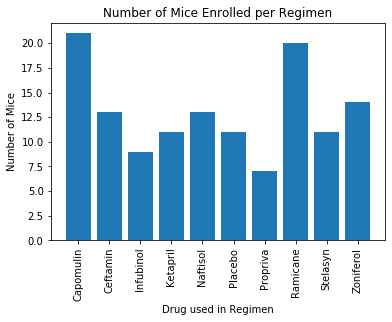

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.title("Number of Mice Enrolled per Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug used in Regimen")
plt.xticks(rotation='vertical')
plt.bar(drug_name, treatment_count)
plt.show()

## Pie plots

In [7]:
# Creates a dataframe sorted by unique ID and what sex it is
unique_df = pd.DataFrame(completed_df.groupby(["ID", "Sex"]).Sex.count())
unique_df["Sex"] = unique_df.index.get_level_values(1)
unique_df.index = unique_df.index.get_level_values(0)

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

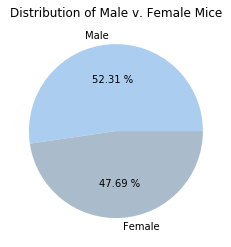

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = unique_df.loc[unique_df.Sex == 'Male'].count()[0]
female = unique_df.loc[unique_df.Sex == 'Female'].count()[0]

labels = ['Male', 'Female']
colors = ['#abcdef', '#aabbcc']

plt.title('Distribution of Male v. Female Mice')
plt.pie([male, female], labels = labels, colors=colors, autopct='%.2f %%')

plt.show()

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
final_df = completed_df.loc[completed_df.Timepoint == 45, :]
promising = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
promising_df = final_df.loc[final_df.Drug.isin(promising), :]

tumor_volume = promising_df.Tumor_Volume
quartiles = tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of for all final tumor volumes is: {iqr}")
print(f"The median for all final tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volumes is: 33.48002734
The upper quartile of tumor volumes is: 62.14221369
The interquartile range of for all final tumor volumes is: 28.66218635
The median for all final tumor volumes is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


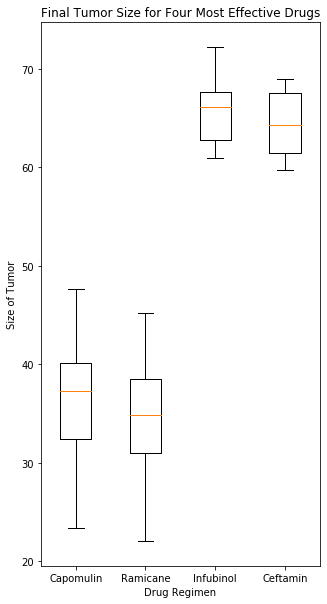

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin = final_df.loc[final_df.Drug == "Capomulin", "Tumor_Volume"]
Ramicane = final_df.loc[final_df.Drug == "Ramicane", "Tumor_Volume"]
Infubinol = final_df.loc[final_df.Drug == "Infubinol", "Tumor_Volume"]
Ceftamin = final_df.loc[final_df.Drug == "Ceftamin", "Tumor_Volume"]

plt.figure(figsize=(5,10))

plt.title("Final Tumor Size for Four Most Effective Drugs")
plt.ylabel("Size of Tumor")
plt.xlabel("Drug Regimen")

boxplot = plt.boxplot([Capomulin, Ramicane, Infubinol, Ceftamin], labels=promising)
plt.show()

## Line and scatter plots

In [12]:
# Mouse with ID #S185 is a mouse that has gone through full treatment with Capomulin
capomulin_df = completed_df.loc[completed_df.Drug == "Capomulin", ['ID', 'Timepoint', 'Tumor_Volume']]
s185_df = capomulin_df.head(10)
s185_df

,ID,Timepoint,Tumor_Volume
10,s185,0,45.000000
11,s185,5,43.878496
12,s185,10,37.614948
13,s185,15,38.177232
14,s185,20,36.866876
15,s185,25,33.949940
16,s185,30,32.959671
17,s185,35,28.328531
18,s185,40,25.472143
19,s185,45,23.343598


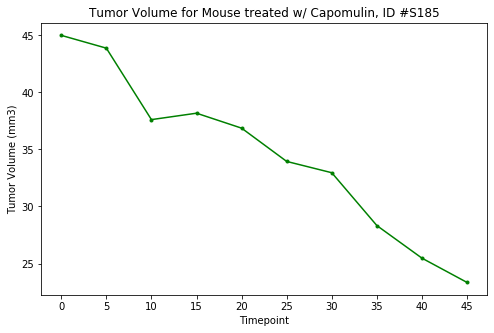

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.figure(figsize=(8,5))
plt.xticks(s185_df.Timepoint)

plt.title("Tumor Volume for Mouse treated w/ Capomulin, ID #S185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(s185_df.Timepoint, s185_df.Tumor_Volume, 'g.-')
plt.show()

In [14]:
# Creates a dataframe of average tumor size for each mouse treated with capomulin, and appends their weight from mouse metadata CSV
capomulin_treated_df = mouse_metadata.loc[mouse_metadata["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)"]]
avg_tumor_volume_df = pd.DataFrame(completed_df.groupby("ID").Tumor_Volume.mean())
avg_df = pd.merge(avg_tumor_volume_df, capomulin_treated_df, how='inner', left_on='ID', right_on='Mouse ID')

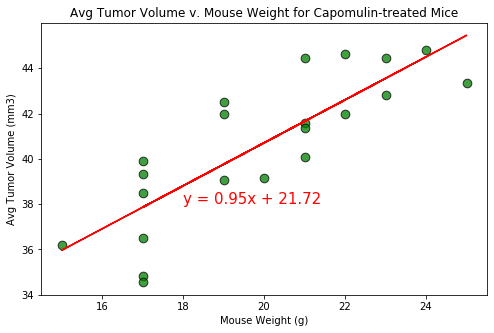

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight = avg_df["Weight (g)"]
volume = avg_df.Tumor_Volume

plt.figure(figsize=(8,5))
plt.title("Avg Tumor Volume v. Mouse Weight for Capomulin-treated Mice")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

plt.scatter(weight, volume, s=75, c='green', edgecolor='black', linewidth=1, alpha=0.75)

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")
plt.show()